# Hotel booking demand

# Description

The data comes from an open hotel booking demand dataset from Antonio, Almeida and Nunes, 2019.

This dataset contains the demand for hotels with more than 100,000+ booking records regarding arrival times, guest demographics, and reservation details including both those that successfully arrived and those that were cancelled. 

|variable                       |class     |description |
|:------------------------------|:---------|:-----------|
|hotel                          |character | Hotel (H1 = Resort Hotel or H2 = City Hotel) |
|is_canceled                    |double    | Value indicating if the booking was canceled (1) or not (0) |
|lead_time                      |double    | Number of days that elapsed between the entering date of the booking into the PMS and the arrival date |
|arrival_date_year              |double    | Year of arrival date|
|arrival_date_month             |character | Month of arrival date|
|arrival_date_week_number       |double    | Week number of year for arrival date|
|arrival_date_day_of_month      |double    | Day of arrival date|
|stays_in_weekend_nights        |double    | Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel |
|stays_in_week_nights           |double    |  Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel|
|adults                         |double    | Number of adults|
|children                       |double    | Number of children|
|babies                         |double    |Number of babies |
|meal                           |character | Type of meal booked. Categories are presented in standard hospitality meal packages: <br> Undefined/SC – no meal package;<br>BB – Bed & Breakfast; <br> HB – Half board (breakfast and one other meal – usually dinner); <br> FB – Full board (breakfast, lunch and dinner) |
|country                        |character | Country of origin. Categories are represented in the ISO 3155–3:2013 format |
|market_segment                 |character | Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators” |
|distribution_channel           |character | Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators” |
|is_repeated_guest              |double    | Value indicating if the booking name was from a repeated guest (1) or not (0) |
|previous_cancellations         |double    | Number of previous bookings that were cancelled by the customer prior to the current booking |
|previous_bookings_not_canceled |double    | Number of previous bookings not cancelled by the customer prior to the current booking |
|reserved_room_type             |character | Code of room type reserved. Code is presented instead of designation for anonymity reasons |
|assigned_room_type             |character | Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons |
|booking_changes                |double    | Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation|
|deposit_type                   |character | Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:<br>No Deposit – no deposit was made;<br>Non Refund – a deposit was made in the value of the total stay cost;<br>Refundable – a deposit was made with a value under the total cost of stay. |
|agent                          |character | ID of the travel agency that made the booking |
|company                        |character | ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons |
|days_in_waiting_list           |double    | Number of days the booking was in the waiting list before it was confirmed to the customer |
|customer_type                  |character | Type of booking, assuming one of four categories:<br>Contract - when the booking has an allotment or other type of contract associated to it;<br>Group – when the booking is associated to a group;<br>Transient – when the booking is not part of a group or contract, and is not associated to other transient booking;<br>Transient-party – when the booking is transient, but is associated to at least other transient booking|
|adr                            |double    | Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights |
|required_car_parking_spaces    |double    | Number of car parking spaces required by the customer |
|total_of_special_requests      |double    | Number of special requests made by the customer (e.g. twin bed or high floor)|
|reservation_status             |character | Reservation last status, assuming one of three categories:<br>Canceled – booking was canceled by the customer;<br>Check-Out – customer has checked in but already departed;<br>No-Show – customer did not check-in and did inform the hotel of the reason why |
|reservation_status_date        |double    | Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel|

# Input Data

In [280]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 
#pd.set_option('display.max_columns', None) 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
 

In [281]:
rawData = pd.read_csv("hotels.csv")
print(data.shape)
rawData.head(6)

(119390, 32)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# Data Prepocessing

In [282]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

## Data Cleaning

### Missing Values

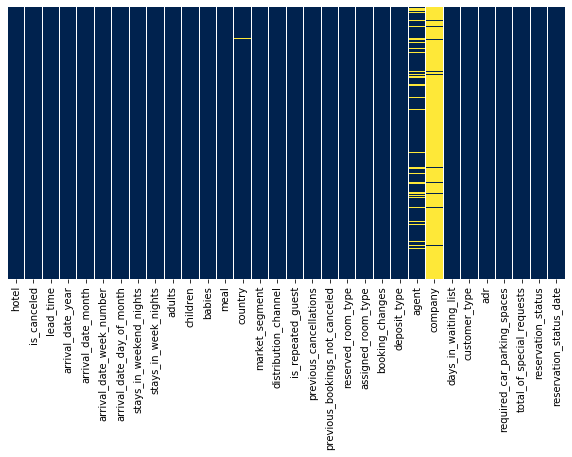

In [283]:
fig, ax = plt.subplots(figsize=(10,5))  
sns.heatmap(rawData.isnull(),yticklabels=False,cbar=False,cmap='cividis')

In [284]:
null = rawData.isnull().sum().sort_values(ascending=True)
percentNull = rawData.isnull().sum()/rawData.isnull().count()*100
percentNull = (round(percentNull, 2)).sort_values(ascending=True)
missingData = pd.concat([null, percentNull], axis=1, keys=['Count Null', '% Percentage'])
missingData.sort_values(by=['Count Null'], ascending=False).head()

/Users/jaimesolis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




,Count Null,% Percentage
company,112593,94.31
agent,16340,13.69
country,488,0.41
children,4,0.00
adr,0,0.00


In [285]:
rawData['company'].dtype

dtype('float64')

In [286]:
rawData['agent'].value_counts().sort_values(ascending=False).to_frame().head(5)

,agent
9.0,31961
240.0,13922
1.0,7191
14.0,3640
7.0,3539


**94%** of the *company* Column is null, so it is better to drop it.   

Almost one quarter of the reservations are made by two *agents*. Since it doesn't makes much sense to include this variable in our model and the dificulties of dealing with the missing values, it is better to drop this column.   

For missing values in *country* a column, it is not harmfull to delete 488 records, only 0.41% of the whole dataset and 4 records for *children* column. 

In [287]:
clnData = rawData.drop(['company', 'agent'], axis=1)
clnData = clnData.dropna() 
clnData.shape

(118898, 30)

### Duplicate Values

In [288]:
# Select all duplicate rows based on all columns 
duplicateRowsDF = clnData[clnData.duplicated(keep=False)]
print("All Duplicate Rows based on all columns are :")
duplicateRowsDF

All Duplicate Rows based on all columns are :


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
21,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,A,1,No Deposit,0,Transient,84.67,0,1,Check-Out,2015-07-07
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,A,1,No Deposit,0,Transient,84.67,0,1,Check-Out,2015-07-07
39,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,E,0,No Deposit,0,Transient,137.00,0,1,Check-Out,2015-07-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,D,0,No Deposit,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,D,0,No Deposit,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,D,0,No Deposit,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119372,City Hotel,0,175,2017,August,35,31,1,3,1,...,A,0,No Deposit,0,Transient,82.35,0,1,Check-Out,2017-09-04


In [289]:
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = clnData[clnData.duplicated()]
 
print("Duplicate Rows except first occurrence based on all columns are :")
duplicateRowsDF

Duplicate Rows except first occurrence based on all columns are :


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,A,1,No Deposit,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,E,0,No Deposit,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,D,0,No Deposit,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,A,0,No Deposit,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,D,0,No Deposit,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,D,0,No Deposit,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,D,0,No Deposit,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,D,0,No Deposit,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


In [290]:
clnData = clnData.drop_duplicates()
clean

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [291]:
# Select all duplicate rows based on all columns 
duplicateRowsDF = clnData[clnData.duplicated(keep=False)]
print("All Duplicate Rows based on all columns are :")
duplicateRowsDF

All Duplicate Rows based on all columns are :


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


### Noise & Outliers

In [292]:
clnData.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000
mean,0.275939,80.202741,2016.211842,26.841694,15.818453,1.007548,2.628955,1.878604,0.139253,0.010815,0.039246,0.030237,0.176761,0.271912,0.753722,106.580816,0.083473,0.699542
std,0.446989,86.102902,0.685989,13.654113,8.834539,1.028821,2.043860,0.625881,0.456848,0.113510,0.194180,0.369629,1.718139,0.728177,10.043309,54.959600,0.280440,0.831880
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,12.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.250000,0.000000,0.000000
50%,0.000000,50.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98.410000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.100000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


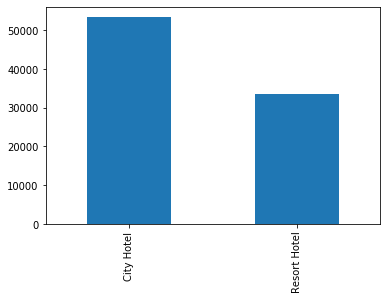

In [293]:
clnData['hotel'].value_counts().plot.bar()

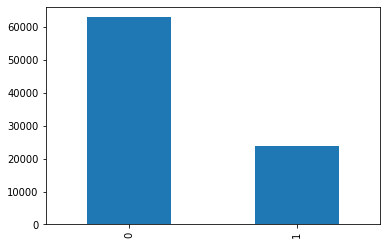

In [294]:
clnData['is_canceled'].value_counts().plot.bar()

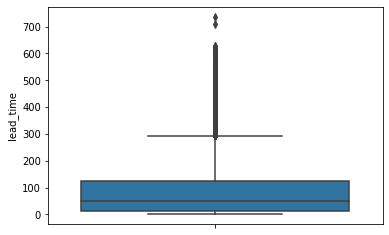

In [295]:
sns.boxplot(y=clnData['lead_time']) #Leave them as-is
#clean[clean['lead_time']>300].sort_values(by='lead_time', ascending=False)

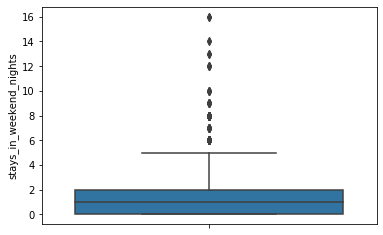

In [296]:
sns.boxplot(y=clnData['stays_in_weekend_nights']) #leave them as-is

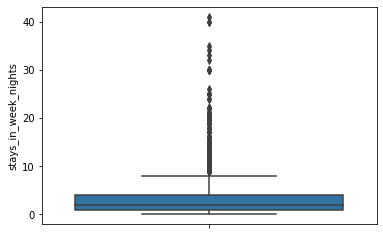

In [297]:
#clean[clean['stays_in_week_nights']>10]
sns.boxplot(y=clnData['stays_in_week_nights']) #leave them as-is

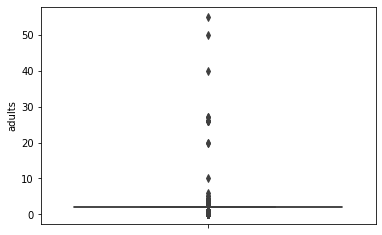

In [298]:
sns.boxplot(y=clnData['adults'])
aux = clnData[clnData['adults']>5]
aux[['is_canceled', 'adults']]
clnData = clnData[clnData['adults']<=6] #Delete > 6 adults

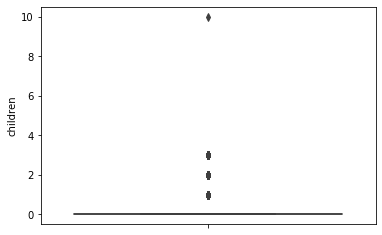

In [299]:
sns.boxplot(y=clnData['children']) 
clnData = clnData[clnData['children']<4] #Delete > 3 children

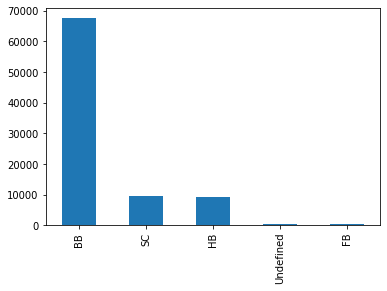

In [300]:
clnData['meal'].value_counts().plot.bar() #Might delete column

In [301]:
pd.crosstab(clnData.is_canceled, clnData.meal, margins=True)

meal,BB,FB,HB,SC,Undefined,All
is_canceled,,,,,,
0,49526,260,6608,6131,406,62931
1,18003,99,2443,3342,82,23969
All,67529,359,9051,9473,488,86900


In [302]:
clnData.groupby('country').count().sort_values(by='hotel', ascending=False) #Maybe change to Continent 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
country,,,,,,,,,,,,,,,,,,,,,
PRT,27422,27422,27422,27422,27422,27422,27422,27422,27422,27422,...,27422,27422,27422,27422,27422,27422,27422,27422,27422,27422
GBR,10431,10431,10431,10431,10431,10431,10431,10431,10431,10431,...,10431,10431,10431,10431,10431,10431,10431,10431,10431,10431
FRA,8837,8837,8837,8837,8837,8837,8837,8837,8837,8837,...,8837,8837,8837,8837,8837,8837,8837,8837,8837,8837
ESP,7250,7250,7250,7250,7250,7250,7250,7250,7250,7250,...,7250,7250,7250,7250,7250,7250,7250,7250,7250,7250
DEU,5385,5385,5385,5385,5385,5385,5385,5385,5385,5385,...,5385,5385,5385,5385,5385,5385,5385,5385,5385,5385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MDG,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
LCA,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
KIR,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


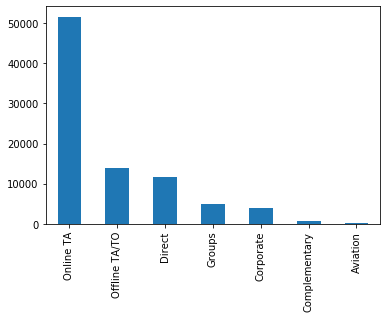

In [303]:
clnData['market_segment'].value_counts().plot.bar() #Might delete column

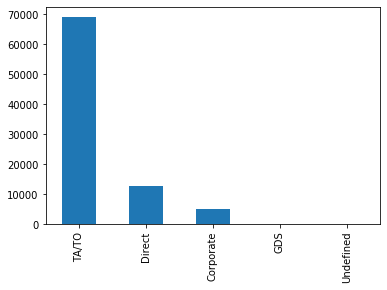

In [304]:
clnData['distribution_channel'].value_counts().plot.bar() #Might delete column

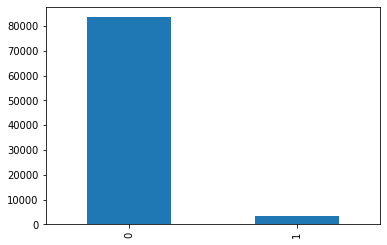

In [305]:
clnData['is_repeated_guest'].value_counts().plot.bar() #might delete column

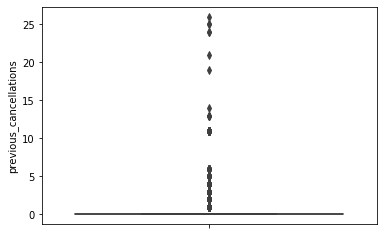

In [306]:
sns.boxplot(y=clnData['previous_cancellations']) #might delete

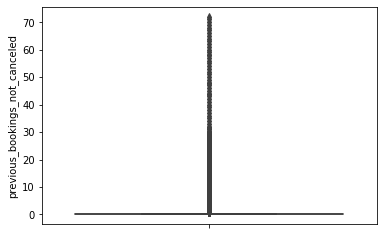

In [307]:
sns.boxplot(y=clnData['previous_bookings_not_canceled']) #might delete Might create a cancelation ratio

In [308]:
pd.crosstab(clnData.is_canceled, clnData.reserved_room_type, margins=True) #Explore

reserved_room_type,A,B,C,D,E,F,G,H,L,P,All
is_canceled,,,,,,,,,,,
0,41505,681,618,12135,4366,1965,1304,353,4,0,62931
1,14651,314,296,5232,1642,851,737,243,2,1,23969
All,56156,995,914,17367,6008,2816,2041,596,6,1,86900


In [309]:
pd.crosstab(clnData.is_canceled, clnData.booking_changes, margins=True) #Explore

booking_changes,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,20,21,All
is_canceled,,,,,,,,,,,,,,,,,,,,,
0,49561,9333,2790,742,292,96,42,28,13,7,...,2,5,4,3,1,2,1,1,1,62931
1,21521,1504,702,131,63,20,17,3,4,1,...,0,0,1,0,1,0,0,0,0,23969
All,71082,10837,3492,873,355,116,59,31,17,8,...,2,5,5,3,2,2,1,1,1,86900


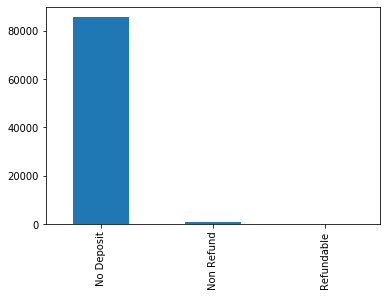

In [310]:
clnData['deposit_type'].value_counts().plot.bar() #might delete column

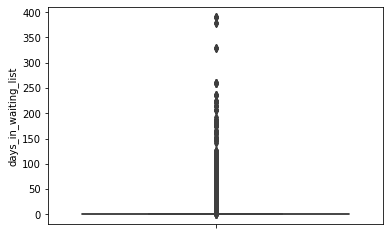

In [311]:
sns.boxplot(y=clnData['days_in_waiting_list']) #might delete

In [312]:
clnData[(clnData['days_in_waiting_list']<1) & (clnData['is_canceled']==1)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,A,0,No Deposit,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,D,0,No Deposit,0,Transient,105.5,0,0,Canceled,2015-04-22
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,...,E,0,No Deposit,0,Transient,123.0,0,0,Canceled,2015-06-23
27,Resort Hotel,1,60,2015,July,27,1,2,5,2,...,E,0,No Deposit,0,Transient,107.0,0,2,Canceled,2015-05-11
32,Resort Hotel,1,96,2015,July,27,1,2,8,2,...,E,0,No Deposit,0,Transient,108.3,0,2,Canceled,2015-05-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110280,City Hotel,1,132,2017,April,17,25,0,0,0,...,K,1,No Deposit,0,Transient,0.0,0,3,Canceled,2017-04-25
111355,City Hotel,1,4,2017,June,23,5,1,0,1,...,A,0,No Deposit,0,Transient,65.0,0,0,Canceled,2017-06-05
111924,City Hotel,1,7,2017,May,22,31,0,1,1,...,A,0,No Deposit,0,Transient,65.0,0,0,Canceled,2017-05-31
111925,City Hotel,1,6,2017,July,29,17,1,0,1,...,D,0,No Deposit,0,Transient,65.0,0,0,No-Show,2017-07-17


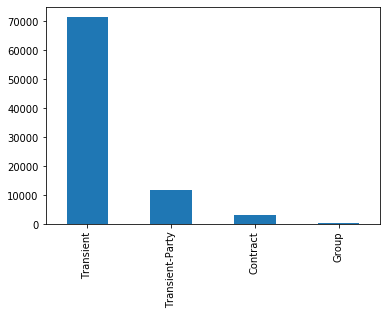

In [313]:
clnData['customer_type'].value_counts().plot.bar() #might delete column

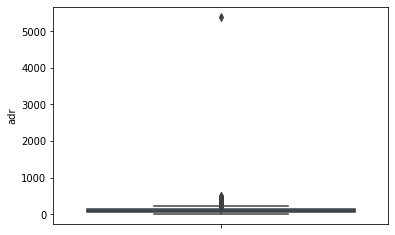

In [314]:
sns.boxplot(y=clnData['adr'])

In [315]:
clnData.adr.describe()

count    86900.000000
mean       106.596454
std         54.948490
min         -6.380000
25%         72.250000
50%         98.495000
75%        134.100000
max       5400.000000
Name: adr, dtype: float64

In [316]:
clnData[clnData.adr<1000].sort_values(by='adr', ascending=False)
clnData = clnData[clnData.adr<600]

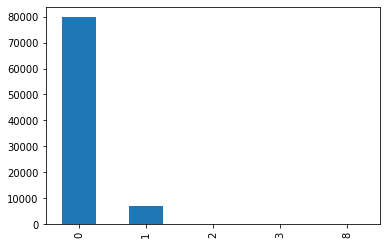

In [317]:
clnData['required_car_parking_spaces'].value_counts().plot.bar() #might delete column

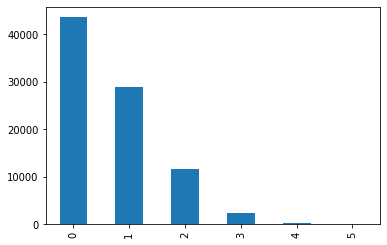

In [318]:
clnData['total_of_special_requests'].value_counts().plot.bar() #interesting?

### Errors / Inconsistent Values

In [319]:
clnData.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,86899.000000,86899.000000,86899.000000,86899.000000,86899.000000,86899.000000,86899.000000,86899.000000,86899.000000,86899.000000,86899.000000,86899.000000,86899.000000,86899.000000,86899.000000,86899.00000,86899.000000,86899.000000
mean,0.275814,80.164801,2016.212039,26.840010,15.818985,1.007434,2.628695,1.874521,0.139162,0.010817,0.039252,0.030242,0.176791,0.271913,0.753852,106.53554,0.083488,0.699651
std,0.446926,86.051677,0.685875,13.654376,8.834579,1.028799,2.043727,0.509521,0.455658,0.113520,0.194196,0.369661,1.718286,0.728201,10.044171,51.93187,0.280462,0.831903
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.38000,0.000000,0.000000
25%,0.000000,12.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.25000,0.000000,0.000000
50%,0.000000,50.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98.49000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.10000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,6.000000,3.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.00000,8.000000,5.000000


In [320]:
clnData[(clnData.adults == 0) & (clnData.children == 0)] #Nobody is in the room
clnData = clnData[(clnData.adults != 0) | (clnData.children != 0)]

In [321]:
clnData.adr.describe()

count    86738.000000
mean       106.711588
std         51.799151
min         -6.380000
25%         72.380000
50%         98.730000
75%        134.167500
max        510.000000
Name: adr, dtype: float64

In [322]:
clnData[(clnData.adr<0)] #Nobody is in the room

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
14969,Resort Hotel,0,195,2017,March,10,5,4,6,2,...,H,2,No Deposit,0,Transient-Party,-6.38,0,0,Check-Out,2017-03-15


In [323]:
clnData = clnData[clnData.adr>=0]
clnData.shape

(86737, 30)

### Non usefull columns

# Data Exploration

## Succesful bookings vs Cancelations

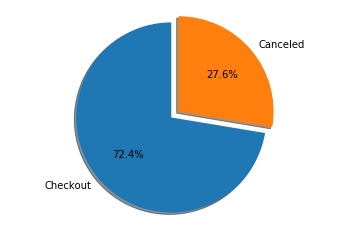

In [325]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Checkout', 'Canceled'
sizes = [len(clnData[clnData.is_canceled==0]),len(clnData[clnData.is_canceled==1]),  ]
explode = (0, 0.1,) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## Succesful bookings vs Cancelations by Hotel

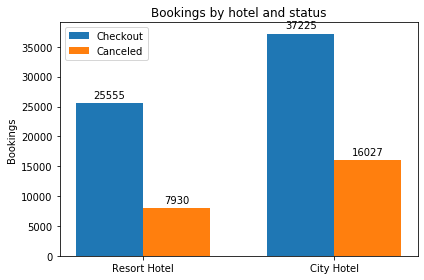

In [326]:
labels = clnData.hotel.unique()
Checkout = [len(clnData[(clnData.hotel=='Resort Hotel')&(clnData.is_canceled==0)]), 
            len(clnData[(clnData.hotel=='City Hotel')&(clnData.is_canceled==0)])]
Canceled = [len(clnData[(clnData.hotel=='Resort Hotel')&(clnData.is_canceled==1)]), 
            len(clnData[(clnData.hotel=='City Hotel')&(clnData.is_canceled==1)])]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Checkout, width, label='Checkout')
rects2 = ax.bar(x + width/2, Canceled, width, label='Canceled')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Bookings')
ax.set_title('Bookings by hotel and status')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [327]:
dfYearMonth = clnData[['hotel', 'is_canceled', 'arrival_date_year', 'arrival_date_month']].copy()
dfYearMonth['booking'] = np.where(dfYearMonth.is_canceled == 0, 1,0)
dfYearMonth['cancelations'] = np.where(dfYearMonth.is_canceled == 1, 1,0)
dfYearMonth.sort_values(by=['arrival_date_year', 'arrival_date_month'], ascending=True, inplace=True)


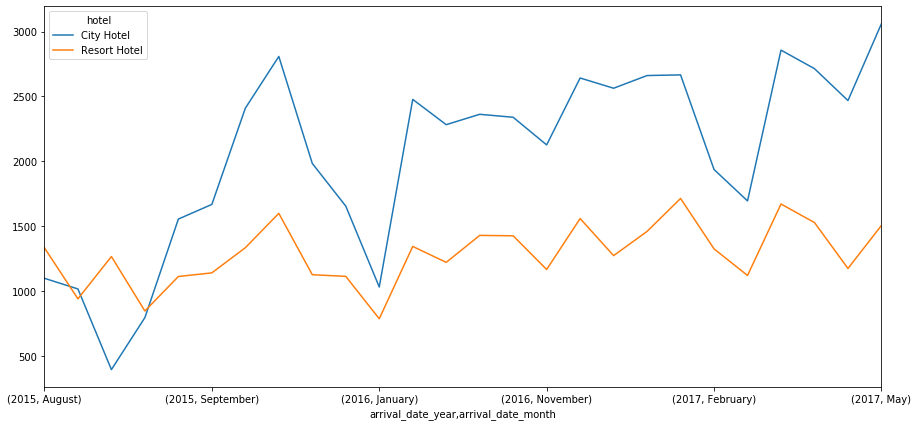

In [328]:
fig, ax = plt.subplots(figsize=(15,7))
dfYearMonth.groupby(['arrival_date_year','arrival_date_month', 'hotel'])['booking'].count().unstack().plot(ax=ax)

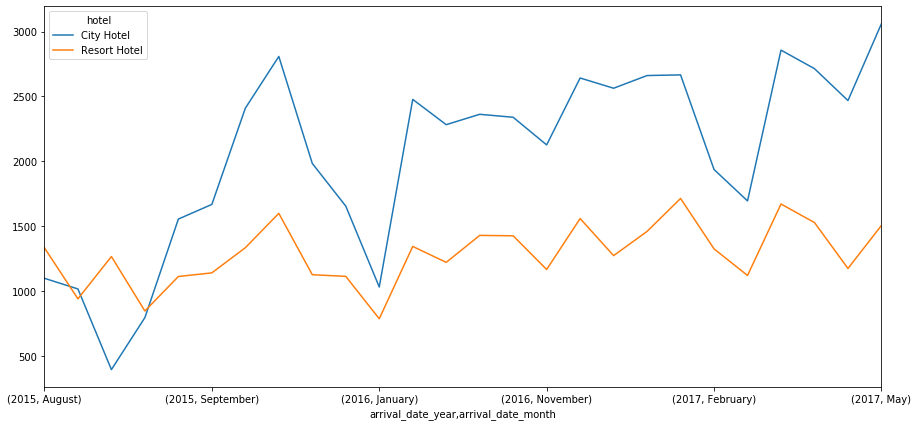

In [329]:
fig, ax = plt.subplots(figsize=(15,7))
dfYearMonth.groupby(['arrival_date_year','arrival_date_month', 'hotel'])['cancelations'].count().unstack().plot(ax=ax)

# Feature Engineering

In [204]:
clnData

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


# Data Analysis

# Results and Conclusion 